# Model Training

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define constants
input_shape = (256, 256, 1)  # Adjust based on your preprocessed image dimensions
num_classes = 5  # Number of classes in your dataset

# Function to build the CNN model
def build_cnn_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))  # Adding dropout for regularization
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model

# Function to compile the model
def compile_model(model):
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Function to apply data augmentation
def apply_data_augmentation(train_dir):
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )
    return train_datagen.flow_from_directory(
        train_dir,
        target_size=(input_shape[0], input_shape[1]),
        batch_size=32,
        color_mode='grayscale',
        class_mode='categorical'
    )

# Function to train the model
def train_model(model, train_generator, epochs=10):
    model.fit(train_generator, epochs=epochs)

# Function to evaluate the model
def evaluate_model(model, test_generator):
    return model.evaluate(test_generator)

# Specify the path to the preprocessed training images
preprocessed_train_images_folder_path = '/Users/aditya/Desktop/Class/DS675Machine Learning/Project/DATASET/SPLIT/train'

# Apply data augmentation
train_generator = apply_data_augmentation(preprocessed_train_images_folder_path)

# Build the CNN model
cnn_model = build_cnn_model()

# Compile the model
compile_model(cnn_model)

# Train the model
train_model(cnn_model, train_generator, epochs=10)

# Specify the path to the test images
test_dataset_folder_path = '/Users/aditya/Desktop/Class/DS675Machine Learning/Project/DATASET/SPLIT/test'

# Apply data augmentation to the test set
test_generator = apply_data_augmentation(test_dataset_folder_path)

# Evaluate the model on the test set
evaluation_result = evaluate_model(cnn_model, test_generator)
print("Evaluation Result:", evaluation_result)

Found 3600 images belonging to 5 classes.
Epoch 1/10
113/113 [==============================] - 84s 734ms/step - loss: 1.5971 - accuracy: 0.2222
Epoch 2/10
113/113 [==============================] - 88s 780ms/step - loss: 1.4082 - accuracy: 0.3814
Epoch 3/10
113/113 [==============================] - 84s 742ms/step - loss: 1.2355 - accuracy: 0.4719
Epoch 4/10
113/113 [==============================] - 87s 772ms/step - loss: 1.0918 - accuracy: 0.5475
Epoch 5/10
113/113 [==============================] - 93s 823ms/step - loss: 1.0168 - accuracy: 0.5803
Epoch 6/10
113/113 [==============================] - 81s 718ms/step - loss: 0.9339 - accuracy: 0.6328
Epoch 7/10
113/113 [==============================] - 83s 736ms/step - loss: 0.8512 - accuracy: 0.6661
Epoch 8/10
113/113 [==============================] - 94s 829ms/step - loss: 0.8375 - accuracy: 0.6706
Epoch 9/10
113/113 [==============================] - 97s 855ms/step - loss: 0.7539 - accuracy: 0.7086
Epoch 10/10
113/113 [==========

# UI

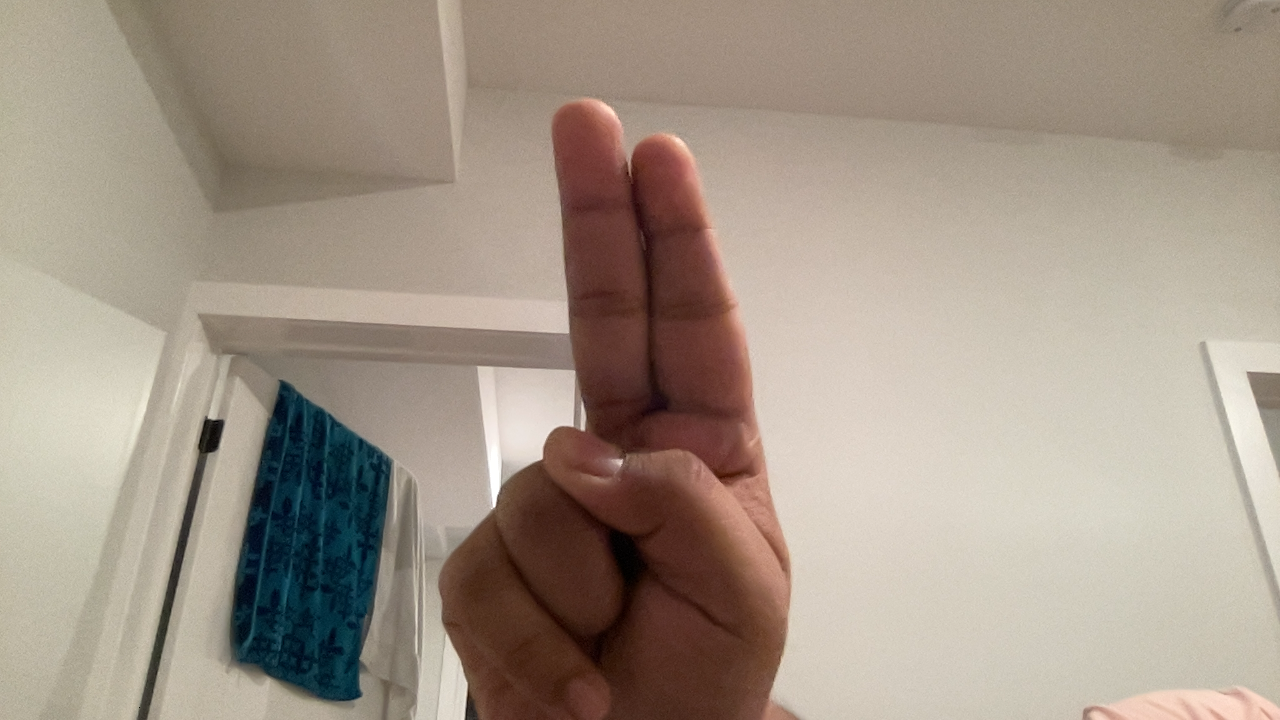

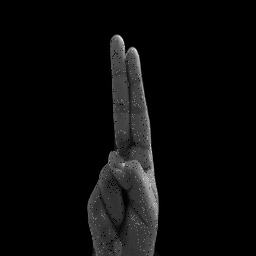

Image captured, background removed, and preprocessed.


In [18]:
import cv2
import rembg
from PIL import Image
import numpy as np
import random
from IPython.display import Image as IPImage, display

# Function to capture an image from the default camera, remove the background, and preprocess it
def capture_and_preprocess():
    # Open the default camera (camera index 0)
    cap = cv2.VideoCapture(0)

    # Allow the camera to adjust (you may need to adjust the delay based on your camera)
    cv2.waitKey(1000)

    # Read a frame from the camera
    ret, frame = cap.read()

    # Release the camera capture
    cap.release()

    if ret:
        # Convert the OpenCV frame to a PIL Image
        pil_image = Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

        # Use rembg to remove the background
        with rembg.remove(pil_image) as result:
            # Convert the result to an OpenCV format
            sign = cv2.cvtColor(np.array(result), cv2.COLOR_RGBA2BGRA)

        # Convert the image to grayscale
        grayscale_image = cv2.cvtColor(sign, cv2.COLOR_BGRA2GRAY)

        # Resize the image to the target size (256x256)
        target_size = (256, 256)
        resized_image = cv2.resize(grayscale_image, target_size)

        # Remove random noise (salt and pepper noise)
        noisy_image = Image.fromarray(resized_image)
        noisy_image = noisy_image.point(lambda p: p + random.choice([-50, 0, 50]) if random.random() < 0.05 else p)

        # Convert the noisy image back to NumPy array
        noisy_image_np = np.array(noisy_image)

        return frame, noisy_image_np
    else:
        print("Failed to capture an image.")
        return None



# Capture an image, remove the background, and preprocess it
input_image, preprocessed_image = capture_and_preprocess()

# Check if the preprocessed image was successfully captured
if preprocessed_image is not None:
    # Display the input image
    display(IPImage(data=cv2.imencode('.png', input_image)[1].tobytes(), format='png'))

    # Display the preprocessed image
    display(IPImage(data=cv2.imencode('.png', preprocessed_image)[1].tobytes(), format='png'))

    print("Image captured, background removed, and preprocessed.")
else:
    print("Image capture failed.")


# Prediction

In [22]:
input_array = np.array(preprocessed_image)

# Expand dimensions to match the input shape expected by the model
input_array = np.expand_dims(input_array, axis=0)

# Make the prediction
predictions = cnn_model.predict(input_array)
predicted_class_index = np.argmax(predictions)

# Map the index to the corresponding class label
class_labels = ['a', 'b', 'c', 'd']
predicted_class_label = class_labels[predicted_class_index]

print(predicted_class_label)


1/1 [==============================] - 0s 22ms/step
a


# TEXT AS INPUT AND Audio AS OUTPUT

In [23]:
from gtts import gTTS
from IPython.display import Audio
from io import BytesIO

def text_to_speech(text):
    # Create a gTTS object with the desired text
    tts = gTTS(text=text, lang='en')

    # Save the generated speech to a BytesIO object
    audio_stream = BytesIO()
    tts.write_to_fp(audio_stream)
    audio_stream.seek(0)

    # Display the generated audio
    return Audio(data=audio_stream.read(), autoplay=True)

# Example usage:
text_input = predicted_class_label
audio_output = text_to_speech(text_input)

# Display the generated audio
audio_output
